In [1]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot
import matplotlib.pyplot as plt

from gseapy import enrichment_map
import networkx as nx

In [2]:
def get_top_ranked_genes(DEG):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    Calu3_12h_DEGs['Rank'] = -np.log10(Calu3_12h_DEGs.padj)*Calu3_12h_DEGs.log2FoldChange
    
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', ascending=False).reset_index(drop=True)
    ranking = Calu3_12h_DEGs[['Unnamed: 0', 'Rank']]

    # Annotate gene symbols using mygene package
    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking['Unnamed: 0'], scopes='ensembl.gene')
    
    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.dropna(subset=['symbol'])  # Drop rows with unexpected gene symbol
    ranking['symbol'] = df['symbol']

    # Filter out any remaining rows with NaNs
    ranking = ranking.dropna(subset=['symbol'])
    # Return the top-ranked genes based on the input num_genes
    return  ranking[['symbol','Rank']]

In [3]:
def enrich_genes(top_ranked_genes):

    enr_Reactome_up = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human', 
                                 cutoff=0.5)
    
    enr_GOBP_up = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human', 
                             cutoff=0.5)
    
    enr_GOMF_up = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human', 
                             cutoff=0.5)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome_up.results, enr_GOBP_up.results, enr_GOMF_up.results

# get the enriched pathways from the datasets reactome, molecular function, biological process

In [4]:
directory = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/'

for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and file_name.endswith('.csv'):
        print(file_name)

h1299_DEGs_36h.csv
h1299_DEGs_24h.csv
h1299_DEGs_12h.csv


In [5]:
directory = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/'

for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and file_name.endswith('.csv'):
        print(file_name)

h1299_DEGs_36h.csv
h1299_DEGs_24h.csv
h1299_DEGs_12h.csv


In [6]:
directory = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/'


for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and "reactome" not in file_name and file_name.endswith('.csv'):
        file_path = os.path.join(directory, file_name)
        print(f'Processing {file_name}...')

        top_ranked_genes = get_top_ranked_genes(file_path)
        enr_reactome_up, enr_gobp_up, enr_gomf_up = enrich_genes(top_ranked_genes)

        # Create the filenames for the CSV files
        enr_reactome_up_file_name = file_name.split('.')[0] + '_enr_Reactome_up.csv'
        enr_gobp_up_file_name = file_name.split('.')[0] + '_enr_GOBP_up.csv'
        enr_gomf_up_file_name = file_name.split('.')[0] + '_enr_GOMF_up.csv'
        
        # Save the DataFrames as CSV files
        enr_reactome_up.to_csv(enr_reactome_up_file_name, index=False)
        enr_gobp_up.to_csv(enr_gobp_up_file_name, index=False)
        enr_gomf_up.to_csv(enr_gomf_up_file_name, index=False)


Processing h1299_DEGs_36h.csv...
querying 1-908...done.
Finished.
1 input query terms found no hit:
	['ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


Processing h1299_DEGs_24h.csv...
querying 1-951...done.
Finished.
3 input query terms found no hit:
	['ENSG00000168078', 'ENSG00000189144', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


Processing h1299_DEGs_12h.csv...
querying 1-1000...done.
querying 1001-1432...done.
Finished.
4 input query terms found no hit:
	['ENSG00000168078', 'ENSG00000189144', 'ENSG00000283486', 'ENSG00000161149']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [7]:
! ls

04_enrichment_functions_h1299.ipynb    h1299_DEGs_12h_enr_GOBP_up.csv
Calu3_8hpi_enrichment_map.png          h1299_DEGs_12h_enr_GOMF_up.csv
Calu3_8hpi_enrichment_map_reactome.png h1299_DEGs_12h_enr_Reactome_up.csv
Calu3_DEGs_12h_enr_GOBP_up.csv         h1299_DEGs_24h_enr_GOBP_up.csv
Calu3_DEGs_12h_enr_GOMF_up.csv         h1299_DEGs_24h_enr_GOMF_up.csv
Calu3_DEGs_12h_enr_Reactome_up.csv     h1299_DEGs_24h_enr_Reactome_up.csv
Calu3_DEGs_8h_enr_GOBP_up.csv          h1299_DEGs_36h_enr_GOBP_up.csv
Calu3_DEGs_8h_enr_GOMF_up.csv          h1299_DEGs_36h_enr_GOMF_up.csv
Calu3_DEGs_8h_enr_Reactome_up.csv      h1299_DEGs_36h_enr_Reactome_up.csv


In [8]:
directory = '/Users/sofialuk/Desktop/thesis/h1299/h1299_deseq/'


# Define the function to preprocess each file
def preproc_df(filename):
    df = get_top_ranked_genes(filename)
    df = df.set_index('symbol')
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=["Rank"], how="all", inplace=True)
    return df

In [9]:

# Loop through each CSV file in the directory and preprocess it
preprocessed_data = {}  # A dictionary to store the preprocessed data


for file_name in os.listdir(directory):
    if '_DEGs_' in file_name and 'reactome' not in file_name and file_name.endswith('.csv'):     
        file_path = os.path.join(directory, file_name)
        var_name = file_name.replace('.csv', '') + '_preprocessed'
        preprocessed_data[var_name] = preproc_df(file_path)

querying 1-908...done.
Finished.
1 input query terms found no hit:
	['ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-951...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
Finished.
3 input query terms found no hit:
	['ENSG00000168078', 'ENSG00000189144', 'ENSG00000283486']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-1000...

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


done.
querying 1001-1432...done.
Finished.
4 input query terms found no hit:
	['ENSG00000168078', 'ENSG00000189144', 'ENSG00000283486', 'ENSG00000161149']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_20339/3131966901.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['symbol'] = df['symbol']


In [13]:
def prerank(df):
    pre_res = gp.prerank(rnk=df, # or rnk = rnk,
                         gene_sets='Reactome_2022',
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    return pre_res

2023-04-23 23:37:03,385 [INFO] Parsing data files for GSEA.............................
2023-04-23 23:37:03,386 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-04-23 23:37:03,428 [INFO] 1456 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-04-23 23:37:03,429 [INFO] 0362 gene_sets used for further statistical testing.....
2023-04-23 23:37:03,429 [INFO] Start to run GSEA...Might take a while..................
2023-04-23 23:37:03,924 [INFO] Congratulations. GSEApy runs successfully................



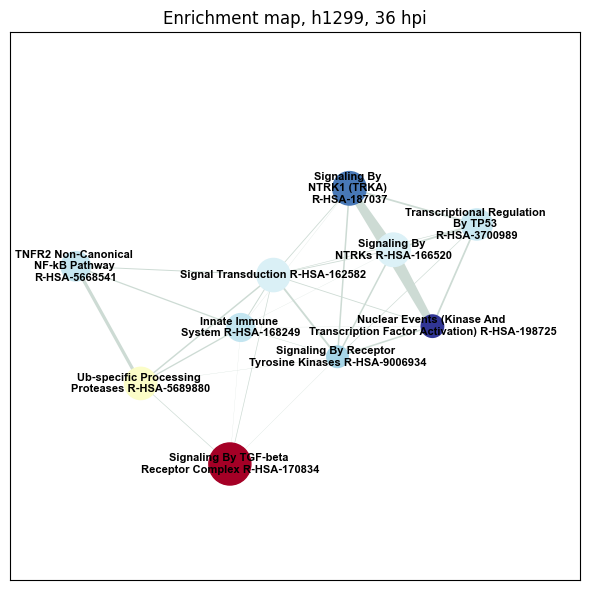

In [28]:
pre_res = prerank(preprocessed_data['h1299_DEGs_36h_preprocessed']).res2d 

nodes, edges = enrichment_map(pre_res, cutoff=0.7)

G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

fig, ax = plt.subplots(figsize=(6, 6))
plt.title("Enrichment map, h1299, 36 hpi")


# init node cooridnates
pos = nx.layout.spring_layout(G, k=0.5, iterations=100)
# set node size
node_size = nodes.Hits_ratio * 1000
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=node_size)
# split node label into multiple lines
labels_dict = {}
for k, v in nodes.Term.items():
    words = v.split(' ')
    n_words = len(words)
    if n_words <= 3:
        label = v
    else:
        label = ''
        for i, word in enumerate(words):
            if i != 0 and i % (n_words // 2) == 0:
                label += '\n'
            label += word + ' '
    labels_dict[k] = label.strip()
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=labels_dict,
                        font_size=8,
                        font_weight='bold',
                        font_family='Arial',
                        verticalalignment='center',
                        horizontalalignment='center')
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*5, edge_weight)),
                       edge_color='#CDDBD4')
# set figure borders
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.tight_layout()


# save figure
plt.savefig('h1299_DEGs_36h_enrichment_map_reactome.png', dpi=300)
plt.show()

In [21]:
pre_res2 =  prerank(preprocessed_data['h1299_DEGs_24h_preprocessed']).res2d 

nodes, edges = enrichment_map(pre_res2, cutoff=0.7)

G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

2023-04-23 23:24:52,052 [INFO] Parsing data files for GSEA.............................
2023-04-23 23:24:52,053 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-04-23 23:24:52,098 [INFO] 1445 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-04-23 23:24:52,099 [INFO] 0373 gene_sets used for further statistical testing.....
2023-04-23 23:24:52,099 [INFO] Start to run GSEA...Might take a while..................
2023-04-23 23:24:52,644 [INFO] Congratulations. GSEApy runs successfully................



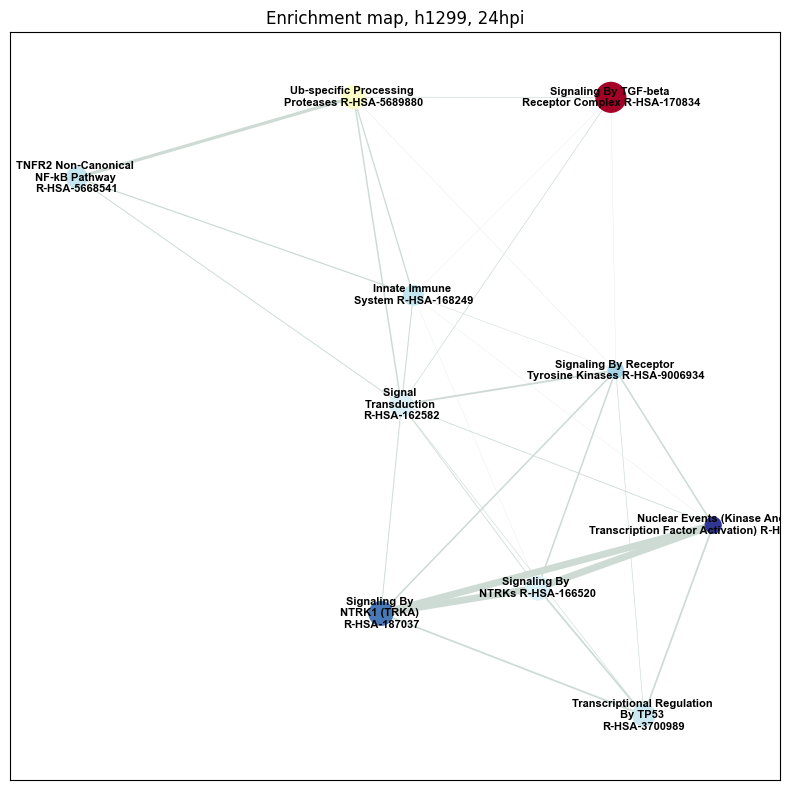

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Enrichment map, h1299, 24hpi")



# init node cooridnates
pos = nx.layout.spring_layout(G, k=0.7, iterations=100)
# set node size
node_size = nodes.Hits_ratio * 500

# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=node_size)

# split node label into multiple lines
labels_dict = {}
for k, v in nodes.Term.items():
    words = v.split(' ')
    n_words = len(words)
    if n_words <= 2:
        label = v
    else:
        label = ''
        for i, word in enumerate(words):
            if i != 0 and i % (n_words // 2) == 0:
                label += '\n'
            label += word + ' '
    labels_dict[k] = label.strip()
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=labels_dict,
                        font_size=8,
                        font_weight='bold',
                        font_family='Arial',
                        verticalalignment='center',
                        horizontalalignment='center')
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*5, edge_weight)),
                       edge_color='#CDDBD4')
# set figure borders
#plt.xlim(-1.3, 1.3)
#plt.ylim(-1.3, 1.3)
plt.tight_layout()


# save figure
plt.savefig('h1299_24hpi_enrichment_map.png', dpi=300)
plt.show()

In [23]:
pre_res3 =  prerank(preprocessed_data['h1299_DEGs_12h_preprocessed']).res2d 
nodes, edges = enrichment_map(pre_res3, cutoff=0.7)

G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])


2023-04-23 23:24:53,605 [INFO] Parsing data files for GSEA.............................
2023-04-23 23:24:53,606 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-04-23 23:24:53,652 [INFO] 1332 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-04-23 23:24:53,653 [INFO] 0486 gene_sets used for further statistical testing.....
2023-04-23 23:24:53,653 [INFO] Start to run GSEA...Might take a while..................
2023-04-23 23:24:54,537 [INFO] Congratulations. GSEApy runs successfully................



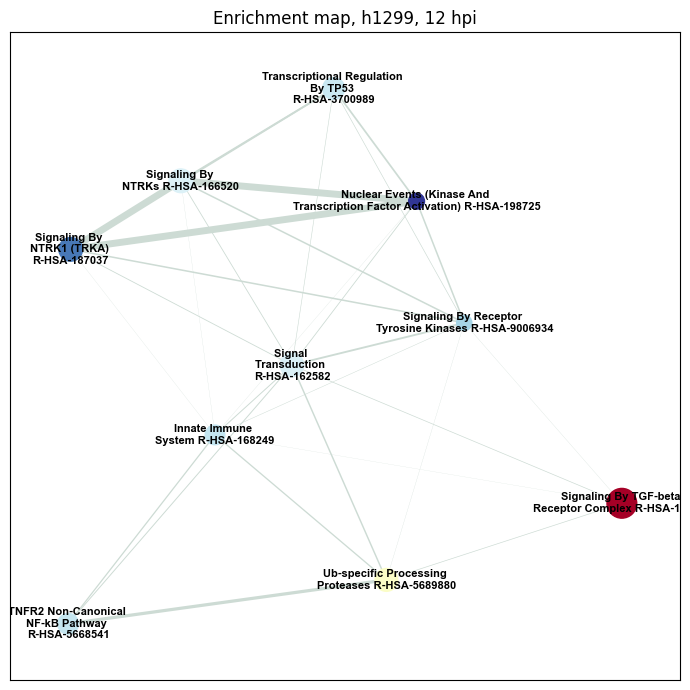

In [41]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title("Enrichment map, h1299, 12 hpi")



# init node cooridnates
pos = nx.layout.spring_layout(G, k=0.7, iterations=100)
# set node size
node_size = nodes.Hits_ratio * 500

# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=node_size)

# split node label into multiple lines
labels_dict = {}
for k, v in nodes.Term.items():
    words = v.split(' ')
    n_words = len(words)
    if n_words <= 2:
        label = v
    else:
        label = ''
        for i, word in enumerate(words):
            if i != 0 and i % (n_words // 2) == 0:
                label += '\n'
            label += word + ' '
    labels_dict[k] = label.strip()
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=labels_dict,
                        font_size=8,
                        font_weight='bold',
                        font_family='Arial',
                        verticalalignment='center',
                        horizontalalignment='center')
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*5, edge_weight)),
                       edge_color='#CDDBD4')
# set figure borders
#plt.xlim(-1.3, 1.3)
#plt.ylim(-1.3, 1.3)
plt.tight_layout()


# save figure
plt.savefig('h1299_12hpi_enrichment_map.png', dpi=300)
plt.show()

2023-04-24 01:27:45,878 [INFO] Parsing data files for GSEA.............................
2023-04-24 01:27:45,878 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-04-24 01:27:45,986 [INFO] 1332 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-04-24 01:27:45,987 [INFO] 0486 gene_sets used for further statistical testing.....
2023-04-24 01:27:45,987 [INFO] Start to run GSEA...Might take a while..................
2023-04-24 01:27:46,865 [INFO] Congratulations. GSEApy runs successfully................

2023-04-24 01:27:46,888 [INFO] Parsing data files for GSEA.............................
2023-04-24 01:27:46,888 [INFO] Enrichr library gene sets already downloaded in: /Users/sofialuk/.cache/gseapy, use local file
2023-04-24 01:27:46,921 [INFO] 1445 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-04-24 01:27:46,921 [INFO] 0373 gene_sets used for further statistical testing.....
2023-04-24 0

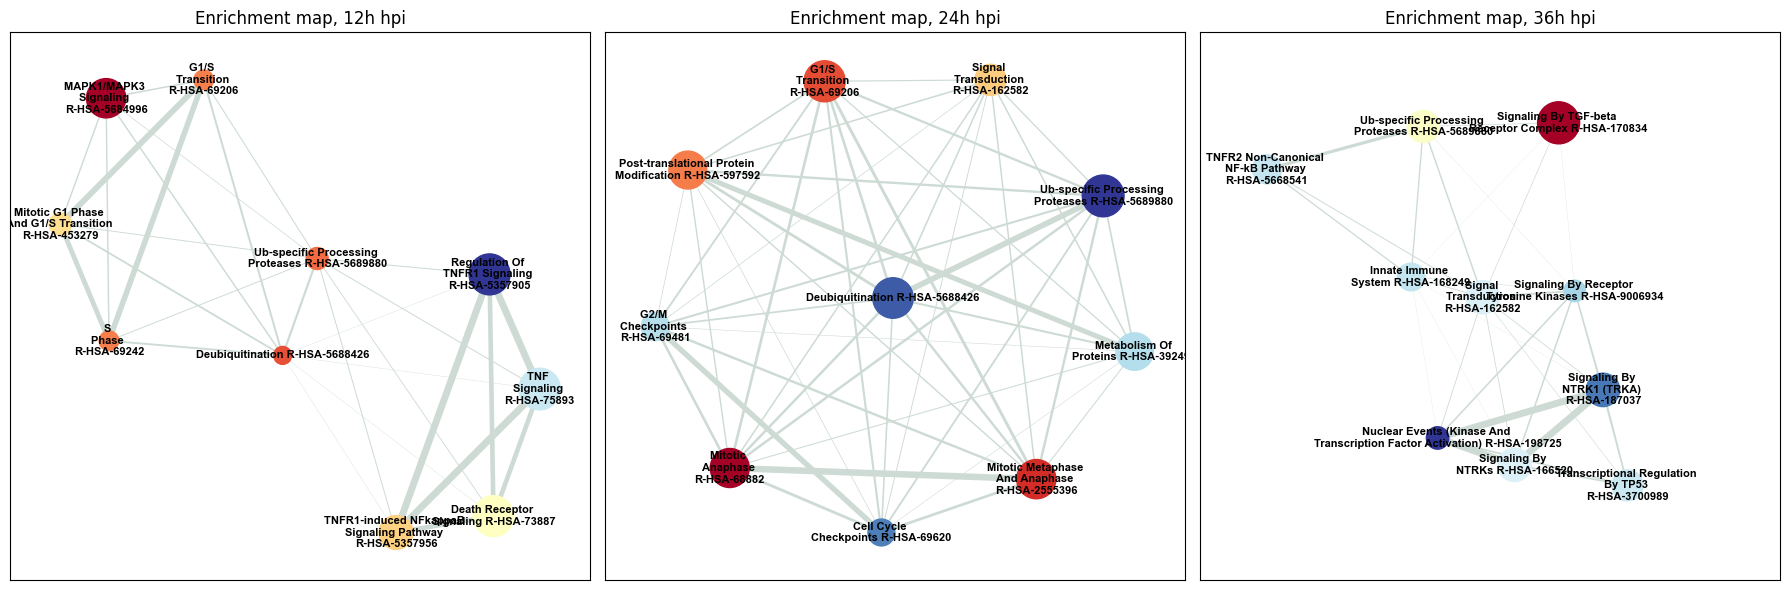

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # create a figure with 3 subplots

for i, (timepoint, ax) in enumerate(zip(['h1299_DEGs_12h_preprocessed', 'h1299_DEGs_24h_preprocessed', 'h1299_DEGs_36h_preprocessed'], axs)):
    pre_res = prerank(preprocessed_data[timepoint]).res2d  # run prerank for each timepoint

    nodes, edges = enrichment_map(pre_res, cutoff=0.7)

    G = nx.from_pandas_edgelist(edges,
                                source='src_idx',
                                target='targ_idx',
                                edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

    # init node cooridnates
    pos = nx.layout.spring_layout(G, k=0.5, iterations=100)
    # set node size
    node_size = nodes.Hits_ratio * 1000
    # draw node
    nx.draw_networkx_nodes(G,
                           pos=pos,
                           cmap=plt.cm.RdYlBu,
                           node_color=list(nodes.NES),
                           node_size=node_size,
                           ax=ax)
    # split node label into multiple lines
    labels_dict = {}
    for k, v in nodes.Term.items():
        words = v.split(' ')
        n_words = len(words)
        if n_words <= 2:
            label = v
        else:
            label = ''
            for i, word in enumerate(words):
                if i != 0 and i % (n_words // 2) == 0:
                    label += '\n'
                label += word + ' '
        labels_dict[k] = label.strip()
    # draw node label
    nx.draw_networkx_labels(G,
                            pos=pos,
                            labels=labels_dict,
                            font_size=8,
                            font_weight='bold',
                            font_family='Arial',
                            verticalalignment='center',
                            horizontalalignment='center',
                            ax=ax)
    # draw edge
    edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
    nx.draw_networkx_edges(G,
                           pos=pos,
                           width=list(map(lambda x: x*5, edge_weight)),
                           edge_color='#CDDBD4',
                           ax=ax)
    # set subplot title
    ax.set_title(f"Enrichment map, {timepoint.split('_')[2]} hpi")

# set figure borders
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.tight_layout()

# save figure
plt.savefig('р1299_enrichment_maps.png', dpi=300)
plt.show()



In [49]:
! pwd

/Users/sofialuk/Desktop/thesis/h1299/untitled folder
